In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

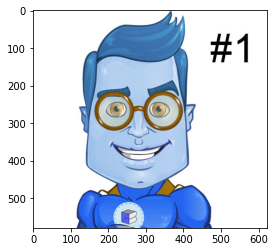

In [2]:
img_ = cv2.imread("./images/cody2.jpg")
plt.imshow(img_)

# Opencv Reads in BGR format instead of RGB, to get the actual image lets convert using convert image

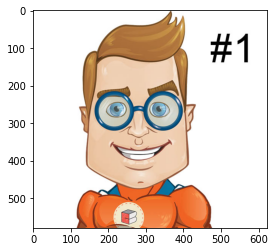

In [3]:
img_ = cv2.imread("./images/cody2.jpg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB) #Convert BGR to RGB
plt.imshow(img_)

In [4]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.style.use("seaborn")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()
    

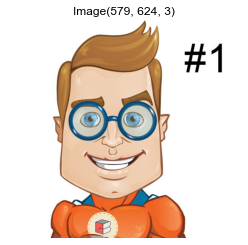

In [5]:
drawImg(img_)

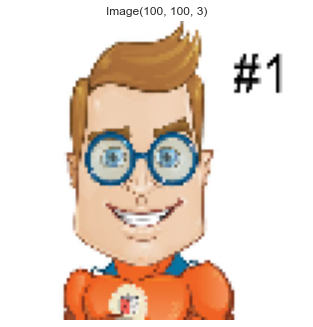

In [6]:
# Resizing the Image
img_ = cv2.resize(img_,(100,100))
drawImg(img_)

# Colors are important feature as they differ amongst the objects but we would use gray scale image for easier computations.

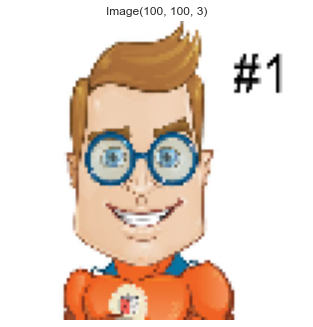

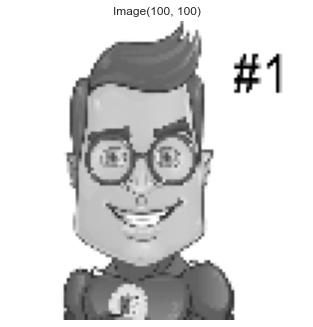

In [7]:
img_ = cv2.imread("./images/cody2.jpg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img)
drawImg(img_gray)

# Building our Convulational Operation

In [8]:
# Hardcoding our own filter , there are many filters like ditecting edges, contrast, blurring in Computer Vision
def convolution(img,img_filter):
    Width = img.shape[0]
    Height = img.shape[1]
    
    Filter = img_filter.shape[0] # Assuming its a square filter
    # Making our own convolution operation , taking element wise product of the filter and window of image and getting a scalar 
    # output , output width would be N-F+1 or a matrix would be (N-F+1)*(N-F+1)
    new_image = np.zeros((Width-Filter+1,Width-Filter+1)) # inaitailay 0 activation map
    
    for row in range(Width-Filter+1):
        for column in range(Width-Filter+1):
            # The outer two loops iterate over the new output and ineer two loops iterate over the filter
            for i in range(Filter):
                for j in range(Filter):
                    new_image[row][column] += img[row+i][column+j]*img_filter[i][j]
                    
                # Sometimes the product may exceed 255 so
                if new_image[row][column] > 255:
                    new_image[row][column] = 255
                # It is also possible that sometimes the product is negative
                elif new_image[row][column] < 0:
                    new_image[row][column] = 0
    return new_image # Returning the activation map

In [9]:
blur_filter = np.ones((3,3))/9.0
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [10]:
output1 = convolution(img_gray,blur_filter)

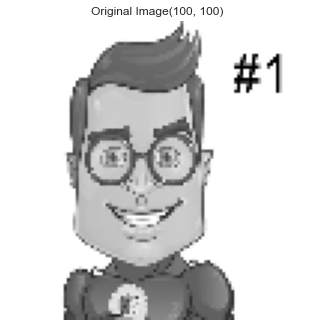

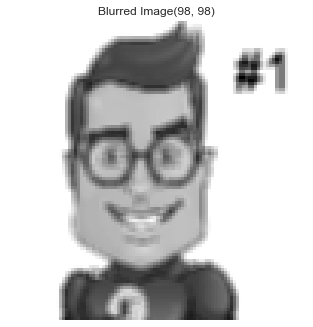

In [11]:
drawImg(img_gray,title="Original Image")
drawImg(output1,title="Blurred Image")

# In blurred filtering what we are doing is that we are averaging the values of the images and when we take average of images then it gets blurred. Let's define one more filter that is an edge filter.

In [12]:
edge_filter = np.array(([1,0,-1],
                       [1,0,-1],
                       [1,0,-1]))
# This is a popular filter which was used in computer vision for edge detection
output2 = convolution(img_gray,edge_filter)

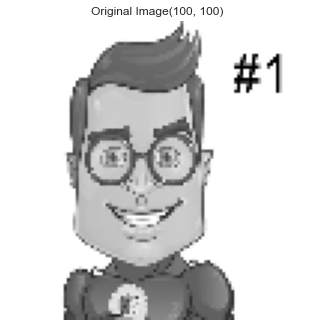

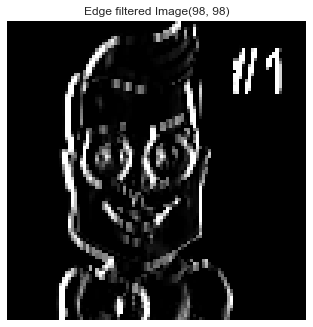

In [13]:
drawImg(img_gray,title="Original Image")
drawImg(output2,title="Edge filtered Image")

## Here we can see that image size is decresing, from 100\*100 to 98\*98. We are extracting features of te image using filters.

# Padding - Getting the output image of same size as of the input image, this is achieved using an extra layer of 0 in input image

(100, 100, 3)


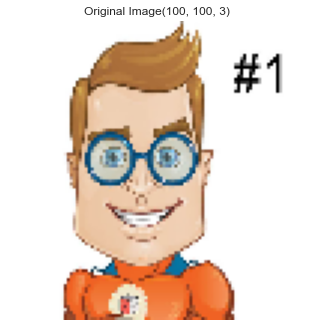

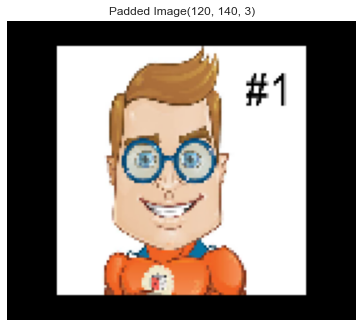

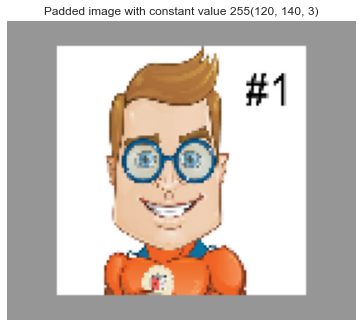

In [14]:
# Before padding the image
print(img.shape)
drawImg(img,"Original Image")
# Padding the image
pad_image = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0) # 10 for first and last row, 20 for first and last
# column and 0 for the channels. constant Value tells the color of the padded area 
drawImg(pad_image,"Padded Image")
# Changing the constant value
pad_image1 = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=150)
drawImg(pad_image1,"Padded image with constant value 255")

# Pooling implimentation using max pooling as its more popularly used than average pooling

In [15]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]]) 

In [23]:
def pooling(X,mode='max'): 
    
    strides = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/strides) + 1
    WO = int((W-f)/strides) + 1 
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*strides
            r_end = r_start + f
            c_start = c*strides
            c_end = c_start + f
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output

In [24]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
